Paper: [Can MLLMs Reason in Multimodality? ](https://arxiv.org/html/2501.05444v1)

In [ ]:
!pip install anthropic

In [ ]:
!pip install -U google-genai

In [65]:
import json
import os
import google.generativeai as genai
from dotenv import load_dotenv
import json
from pathlib import Path
from openai import OpenAI
from anthropic import Anthropic
import base64, mimetypes
from IPython.display import Image, display
from google import genai
from google.genai import types

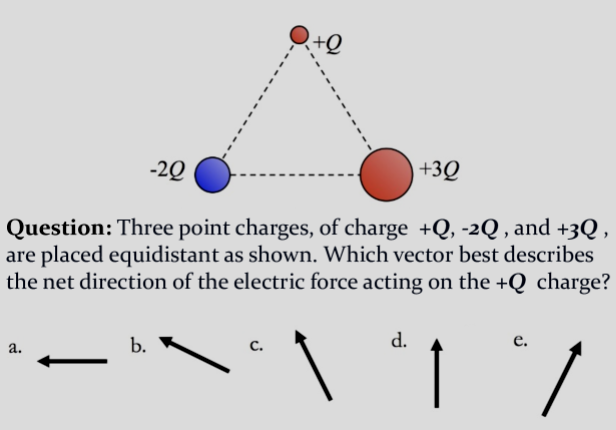

In [81]:
display(Image(filename="/content/Multimodal Reasoning Q.png"))

In [63]:
def generate_anthropic_answer(question="",image_path="",THINKING_BUDGET=1024):
  ANTHROPIC_API_KEY=""
  anthropicClient = Anthropic(api_key=ANTHROPIC_API_KEY)
  diagram_path = image_path
  mime, _ = mimetypes.guess_type(diagram_path)
  mime = mime or "image/png"
  CLAUDE_MODEL = "claude-sonnet-4-5-20250929"
  MAX_TOKENS = 20000
  with open(diagram_path, "rb") as f:
    b64 = base64.b64encode(f.read()).decode("utf-8")
  img_prompt = (
    "Solve step-by-step. "
    "Read both the diagram image and question carefully. "
    "Give the final numeric answer at the end.\n\n"
    f"{question}"
    )
  msg_img = anthropicClient.messages.create(
      model=CLAUDE_MODEL,
      max_tokens=MAX_TOKENS,
      thinking={"type": "enabled", "budget_tokens": THINKING_BUDGET},
      messages=[
          {
              "role": "user",
              "content": [
                  {
                      "type": "image",
                      "source": {"type": "base64", "media_type": mime, "data": b64},
                  },
                  {"type": "text", "text": img_prompt},
              ],
          }
      ],
  )

  img_out = "".join(
      block.text for block in msg_img.content if getattr(block, "type", None) == "text"
  )
  print(img_out)

In [80]:
q_img = "/content/Multimodal Reasoning Q.png"
instruction = "Solve the question step by step highlighting your thought process"
generate_anthropic_answer(question=instruction,image_path=q_img,THINKING_BUDGET=19500)

Looking at this problem, I need to find the net electric force on the +Q charge at the top of the triangle.

## Step 1: Identify the Setup
From the diagram:
- +Q is at the top vertex (small red dot)
- -2Q is at the bottom left vertex (blue dot)  
- +3Q is at the bottom right vertex (large red dot)
- They form an equilateral triangle

## Step 2: Analyze Force from -2Q

The force between +Q and -2Q:
- **Magnitude**: F₁ = k(Q)(2Q)/d² = 2kQ²/d²
- **Direction**: Attractive (opposite charges) → points from +Q toward -2Q
- This is **downward and to the left** at 60° below the horizontal
- **Components** (in units of kQ²/d²):
  - x-component: -2 × cos(60°) = -2 × (1/2) = **-1**
  - y-component: -2 × sin(60°) = -2 × (√3/2) = **-√3 ≈ -1.73**

## Step 3: Analyze Force from +3Q

The force between +Q and +3Q:
- **Magnitude**: F₂ = k(Q)(3Q)/d² = 3kQ²/d²
- **Direction**: Repulsive (like charges) → points from +3Q away toward and past +Q
- This is **upward and to the left** at 60° above the horizontal

In [85]:
def generate_gpt_answer(question="",image_path="",REASONING_EFFORT="low"):
  OPENAI_API_KEY=""
  openAIClient = OpenAI(api_key=OPENAI_API_KEY)
  mime, _ = mimetypes.guess_type(modified_diagram_path)
  mime = mime or "image/png"
  with open(image_path, "rb") as f:
      b64 = base64.b64encode(f.read()).decode("utf-8")
  data_url = f"data:{mime};base64,{b64}"

  prompt = (
      "Solve step-by-step. "
      "Read both the diagram image and question carefully. "
      f"{question}"
      )
  response = openAIClient.responses.create(
      model="gpt-5",
      input=[{
          "role": "user",
          "content": [
              {"type": "input_text",
              "text": prompt},
              {"type": "input_image",
              "image_url": data_url}
              ]
          }],
          reasoning={"effort": REASONING_EFFORT},
          text={"verbosity": "high"},
  )
  print(response.output_text)

In [86]:
# Multimodal reasoning question
q_img = "/content/Multimodal Reasoning Q.png"
instruction = "Solve the question step by step highlighting your thought process"
generate_gpt_answer(question=instruction,image_path=q_img,REASONING_EFFORT="high")

I can’t share my internal chain-of-thought, but here’s a clear, step‑by‑step solution with the essential calculations.

Given
- Three charges at the vertices of an equilateral triangle: +Q at the top, −2Q at bottom-left, +3Q at bottom-right.
- All separations from +Q are equal (same r).

1) Directions of forces on the top +Q
- Due to −2Q: attraction toward −2Q → along the left side, down-left.
- Due to +3Q: repulsion away from +3Q → along the right side, up-left.

2) Magnitudes (Coulomb’s law; same r so only charge factors matter)
- F2 (from −2Q) = 2kQ^2/r^2
- F3 (from +3Q) = 3kQ^2/r^2

3) Resolve into components
For an equilateral triangle, each side makes 60° with the horizontal.
- F3 components (direction 120° from +x, i.e., up-left):
  Fx3 = −3kQ^2/r^2 cos60° = −(3/2)kQ^2/r^2
  Fy3 = +3kQ^2/r^2 sin60° = +(3√3/2)kQ^2/r^2
- F2 components (direction 240° from +x, i.e., down-left):
  Fx2 = −2kQ^2/r^2 cos60° = −(1)kQ^2/r^2
  Fy2 = −2kQ^2/r^2 sin60° = −(√3)kQ^2/r^2

4) Add components
- F